In [1]:
import os

In [2]:
#to get the file path in notebooks
# __file__ path no work in Jupiter note
#https://stackoverflow.com/questions/39125532/file-does-not-exist-in-jupyter-notebook
current_dir=os.path.abspath('')

Load dataset

In [3]:
# download the tiny shakespeare dataset
sufix="8maps_alpha"
folder=f"microstate_{sufix}_2sE_dataset_pretokenize"
input_file_path = os.path.join(os.path.dirname(current_dir), f"data/{folder}/output_{sufix}_2sE.train.txt")
print(input_file_path)

/home/rjarpa/code/nanoGPT/data/microstate_8maps_alpha_2sE_dataset_pretokenize/output_8maps_alpha_2sE.train.txt


In [4]:
# Read the text file and store each line as an element in a list
def read_text_file_to_list(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        lines = [line.strip() for line in lines]
    return lines


In [5]:
# Replace 'file_path.txt' with the actual path to your text file
dataset = read_text_file_to_list(input_file_path)

# Print the list
#print(dataset)

**Load tokenizer**

In [6]:
token_file_path = f"{os.path.dirname(current_dir)}/data/tokenizer-output-{sufix}-2sE.json"

In [7]:
#https://huggingface.co/docs/transformers/fast_tokenizers

from transformers import PreTrainedTokenizerFast
tokenizer = PreTrainedTokenizerFast(tokenizer_file=token_file_path)


/opt/anaconda3/envs/gpt/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:


# Tokenize the dataset and count the occurrences
vocab_count = {}
for sentence in dataset:
    encoding = tokenizer.encode(sentence)
    #tokens = encoding.tokens
    for token in encoding:
        vocab_count[token] = vocab_count.get(token, 0) + 1


In [9]:
# Tokenize the dataset and count the occurrences
vocab_count_decoded = {}
for sentence in dataset:
    encoding = tokenizer.encode(sentence)
    #tokens = encoding.tokens
    for token in encoding:
        vocab_count_decoded[tokenizer.decode(token)] = vocab_count_decoded.get(tokenizer.decode(token), 0) + 1


In [10]:
# Optionally, you can sort the vocabulary by count
sorted_vocab_count = {k: v for k, v in sorted(vocab_count.items(), key=lambda item: item[1], reverse=True)}


In [11]:
# Optionally, you can sort the vocabulary by count
sorted_vocab_count_decoded = {k: v for k, v in sorted(vocab_count_decoded.items(), key=lambda item: item[1], reverse=True)}


In [12]:
# Print the result
for token, count in sorted_vocab_count_decoded.items():
    print(f"{token}: {count}")

CCCCCCCC: 288
FF: 286
HHHHHHH: 283
BBBBBBBB: 280
HH: 274
HHHHHH: 274
GGGGGGGGG: 273
DDDDDDDDDD: 272
CCCCCCC: 271
DDDDDDD: 271
HHHHH: 270
BBBBBB: 267
GGGGGGG: 267
EEEEEEEEE: 266
DDDDDD: 265
DDDDD: 264
DDDDDDDD: 261
GG: 260
BBBBBBBBBB: 260
DD: 259
BB: 257
FFFFFFF: 257
AAAAAAAAA: 256
CCCCCCCCC: 256
FFFFFFFFFF: 256
EEEEEEE: 255
HHHHHHHHHH: 255
GGGGGGGG: 255
AAAAAAAAAA: 254
EE: 253
DDDDDDDDD: 253
BBBBBBB: 251
EEEEEEEE: 250
EEEEEEEEEE: 250
GGGGGG: 249
GGGGGGGGGG: 248
FFFFFFFF: 245
FFFFFFFFF: 243
FFFFFF: 242
BBBBBBBBB: 239
CC: 233
GGGGG: 232
HHHHHHHH: 231
EEEEEEEEEEE: 231
GGGGGGGGGGG: 228
CCCCCCCCCC: 228
CCCCCC: 228
GGG: 227
AA: 223
CCCCC: 221
HHHHHHHHH: 219
AAAAAAAA: 218
AAAAAAA: 217
AAAEEEE: 216
AAAABBBB: 214
HHH: 213
FFFFFFFFFFF: 213
DDDD: 213
FFFFF: 213
AAAAAAAAAAA: 212
HHHH: 211
BBBBB: 210
DDDDDDDDDDD: 207
CCCC: 206
AAAEEE: 206
AAAFFF: 205
AAACCC: 204
FFFEEE: 204
FFFHHH: 203
BBBBBBBBBBB: 202
HHHHHHHHHHH: 202
CCC: 201
BBBB: 200
AAAAAAAAAAAA: 199
GGGGGGGGGGGG: 195
CCCCCCCCCCC: 195
GGGG: 19

In [13]:
# Print the result
for token, count in sorted_vocab_count.items():
    print(f"{token}: {count}")
    

42: 288
17: 286
69: 283
40: 280
21: 274
61: 274
73: 273
87: 272
66: 271
68: 271
53: 270
58: 267
64: 267
71: 266
60: 265
52: 264
44: 261
16: 260
88: 260
20: 259
18: 257
65: 257
70: 256
75: 256
85: 256
63: 255
89: 255
39: 255
82: 254
15: 253
77: 253
67: 251
38: 250
83: 250
56: 249
86: 248
43: 245
72: 243
57: 242
74: 239
19: 233
49: 232
45: 231
95: 231
94: 228
84: 228
59: 228
35: 227
14: 223
50: 221
79: 219
33: 218
62: 217
128: 216
157: 214
41: 213
92: 213
28: 213
48: 213
90: 212
29: 211
51: 210
99: 207
27: 206
102: 206
109: 205
100: 204
105: 204
140: 203
97: 202
104: 202
34: 201
25: 200
101: 199
107: 195
98: 195
24: 194
119: 193
32: 192
151: 192
108: 191
118: 191
26: 190
36: 190
37: 189
113: 189
120: 189
134: 189
115: 188
106: 188
121: 186
126: 185
55: 185
129: 184
76: 184
137: 181
54: 181
110: 181
132: 180
123: 179
125: 179
130: 178
139: 178
127: 177
11: 177
179: 175
114: 173
47: 172
138: 171
149: 170
142: 170
116: 169
124: 169
170: 168
155: 168
12: 167
175: 167
136: 165
188: 165
112: 1

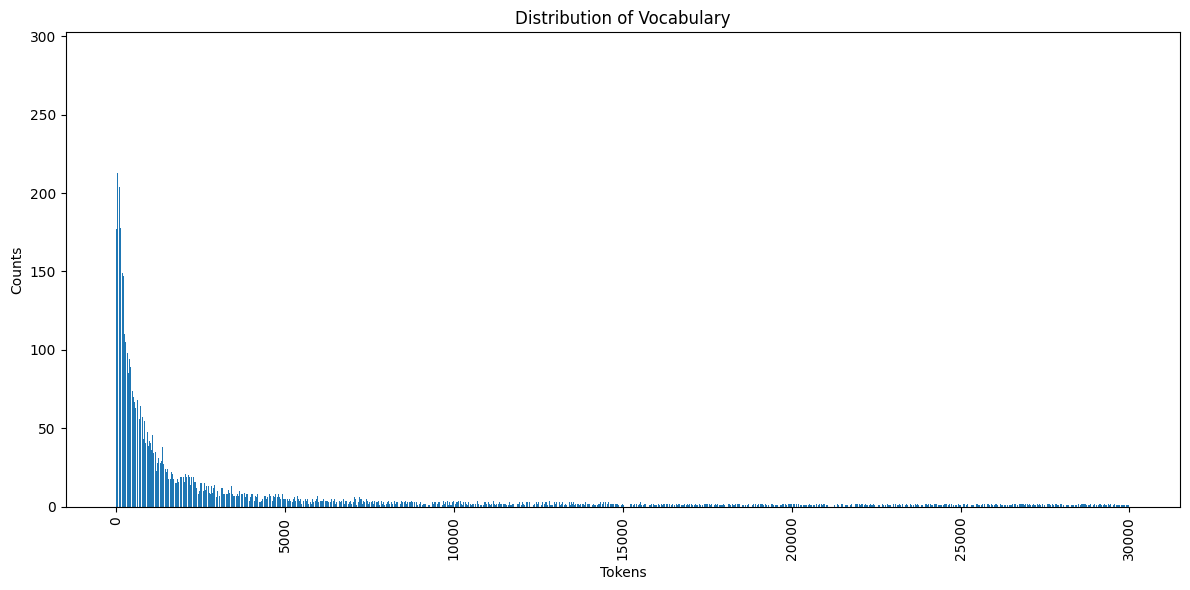

In [14]:
import matplotlib.pyplot as plt

# Your code to calculate sorted_vocab_count goes here...

# Convert the sorted_vocab_count dictionary into two lists: tokens and counts
tokens, counts = zip(*sorted_vocab_count.items())

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(tokens, counts)
plt.xlabel("Tokens")
plt.ylabel("Counts")
plt.title("Distribution of Vocabulary")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
# Filter vocab_count to include items with at least 100 occurrences
min_occurrences = 100
filtered_vocab_count = {token: count for token, count in sorted_vocab_count_decoded.items() if count >= min_occurrences}


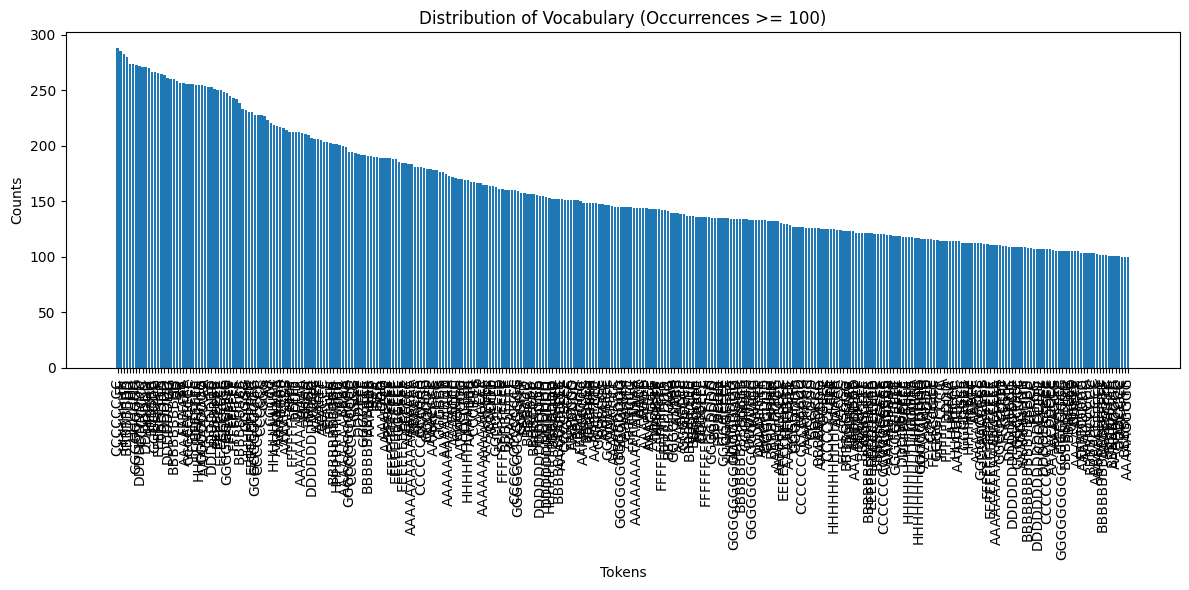

In [16]:
# Convert the filtered_vocab_count dictionary into two lists: tokens and counts
tokens, counts = zip(*filtered_vocab_count.items())

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(tokens, counts)
plt.xlabel("Tokens")
plt.ylabel("Counts")
plt.title(f"Distribution of Vocabulary (Occurrences >= {min_occurrences})")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [17]:
print(f"filtered_vocab_count: {len(filtered_vocab_count)}")
print(f"vocab_count_decoded: {len(vocab_count_decoded)}")

aprox_words=round(len(filtered_vocab_count)*100/95)
print(f"recommended size vocab: {aprox_words}")

filtered_vocab_count: 324
vocab_count_decoded: 26458
recommended size vocab: 341


In [18]:
#whole dataset
#filtered_vocab_count: 3637
#vocab_count_decoded: 29572
#recommended size vocab: 3828